# *COVID-19 in Brazil*
## *Author: Charles Zhang*
### *Driving Question: How deadly is COVID-19?  How can we present data about this question so that the uncertainty is made very clear to the user of the visualisation of the results?*


## **Introduction**

The team and I decided to dedicate this weeks analysis on the COVID-19 pandemic in our individual countries and aim to address the driving question proposed. This report will discuss the general trend of COVID-19 in Brazil, accounting for reasons for and against the results and therefore deduce methods of visualising the uncertainties that arise in such analysis. This report is split into two main sections: 

* Part 1.   EDA

     * Cleaning and Merging
     
     * EDA
     
     
* Part 2.   "How deadly is COVID-19?"

     * Case Fatality Rate
     
     * Infection Fatality Rate

## Part 1: EDA
### * Cleaning and Merging 

The purpose of this section is to load and clean the dataset required in addressing the driving question. The author of this section (Part 1a.) is Sherry Wang (Tracker) and a separate notebook for merging the data can be found on Github.

The code below imports essential packages in order to conduct such analysis.

In [57]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
import io
import plotly.io as pio
pio.renderers.default = "png"
pd.options.mode.chained_assignment = None 

In [58]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


These codes blow read in 'Our World Data' as df and recovery data from John Hopkins as jh_recovered. "read_csv()" function with url can ensure the latest data which comes straightly from Github repository.

In [59]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
jh_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

To make sure the dataframe more intutive, it is necessary to find common variables and melt them into one from two different datasets. To achieve this, ".melt()" function is used.

In [60]:
jh_recovered2=jh_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'],
                                var_name = 'date', 
                                value_name = 'recovered')

These codes below are used to unified the format of date in both datasets, which can make much easier and cleaner on future visualisation.

In [61]:
#df["date"]= df["date"].dt.strftime("%m/%d/%y")
df['date']=pd.to_datetime(df['date'], errors='ignore')
jh_recovered2['date']=pd.to_datetime(jh_recovered2['date'], errors='ignore')

Before we can merge, as the first dataset cummulates all data for each country, we need to remove the "States" in the Johns Hopkins dataset and sum the recovery cases so we can obtain the recovery cases for an entire country and not have it split up into Provinces/States. 

In [62]:
jh_recovered2=jh_recovered2.drop(["Province/State","Lat","Long"], axis=1)
jh_recovered2_grouped=jh_recovered2.groupby(["Country/Region","date"]).sum()

Therefore, we can merge the two data sets based on the 'location' & 'date' variables in the 'Our World data' and 'Country/Region' & 'date' variables in the John Hopkins data.

In [63]:
covid=df.merge(jh_recovered2_grouped, 
                how='inner', 
                left_on=["location", "date"], 
                right_on=["Country/Region","date"])

For now, a satisfied dataset only contains useful information has been generated. We can create a copy of this dataset for studying without changing anything on raw data.

##### Snapshot of merged dataset

In [64]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,recovered
0,AFG,Asia,Afghanistan,2020-01-22,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
1,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
2,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
3,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0
4,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,0


### * EDA

As my individual task target country is Brazil. The codes below is to extract all data entries for Brazil alone. Filtering for "location=Brazil" ensures that we only focus on one country.

In [65]:
brazil = covid[covid["location"]=="Brazil"]

Now we can use varible *brazil* to access Brazil data without changing raw data.

#### New Daily Confirmed Cases In Brazil

These codes below aim to plot the new cases each day as a function of time.

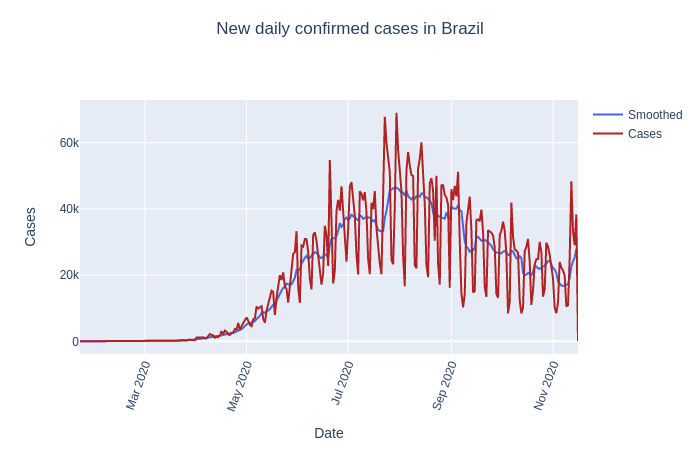

In [66]:
fig= go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=brazil['date'], y=brazil['new_cases_smoothed'], name = 'Smoothed',
                         line=dict(color='royalblue', width=2)))
fig.add_trace(go.Scatter(x=brazil['date'], y=brazil['new_cases'], name = 'Cases',
                         line=dict(color='firebrick', width=2)))
# Edit the layout
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Cases")
fig.update_layout(
    title={
        'text': "New daily confirmed cases in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Comment: Generally the increasement is exmponential in daily covid-19 cases everyday, and the peak occurs on 30 July. After that, the line drop down slightly and keeps around 20k.

#### New Daily Deaths In Brazil

We can plot the new death each day as a function of time.

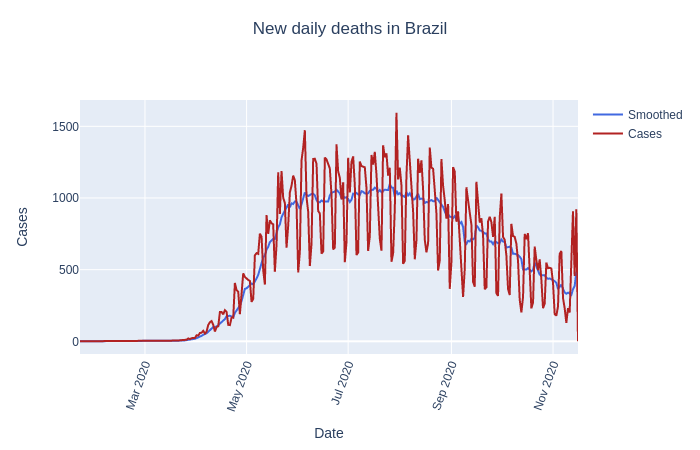

In [67]:
fig= go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=brazil['date'], y=brazil['new_deaths_smoothed'], name = 'Smoothed',
                         line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=brazil['date'], y=brazil['new_deaths'], name = 'Cases',
                         line=dict(color='firebrick', width=2)))
# Edit the layout
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Cases")
fig.update_layout(
    title={
        'text': "New daily deaths in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Comment: This trend is similar to the new case plot but with much smaller numbers. Same as the previous, the daily deaths of Brazil reached the peak on 30 July too, and then drops a little. 

##### Death Peak Day of COVID-19 In Brazil

This is to show the maximum daily deaths of Brazil.

In [68]:
brazil[brazil["new_deaths"]==brazil["new_deaths"].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,recovered
6347,BRA,South America,Brazil,2020-07-30,2552265.0,69074.0,46393.0,90134.0,1595.0,1051.857,12007.302,324.963,218.259,424.041,7.504,4.949,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67066.0,0.316,NaN,NaN,tests performed,72.69,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759,1956807


On 30 July 2020, Brazil reached the peak day of death caused by COVID-19, of which figure is 1595 deaths.

#### New Daily Recovered Cases In Brazil

We can plot the new recovered cases each day as a function of time.

In [69]:
new_recovery=[0]
rec=list(brazil["recovered"])
for i in range(len(brazil)-1):
  new_recovery.append(rec[i+1]-rec[i])

brazil["new_recovery"]=new_recovery

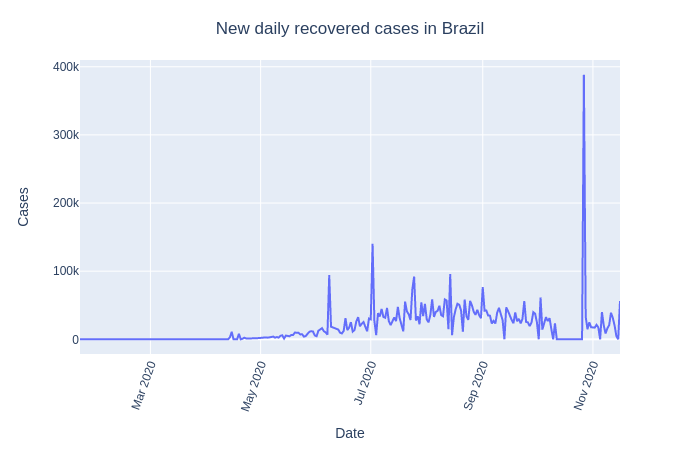

In [70]:
fig=px.line(brazil,x="date",
        y="new_recovery")
# Edit the layout
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Cases")
fig.update_layout(
    title={
        'text': "New daily recovered cases in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Comment: There are some sharp increasement on serveral days, and an extreme peak recovery at the end of October 2020.

#### New Daily Tests In Brazil

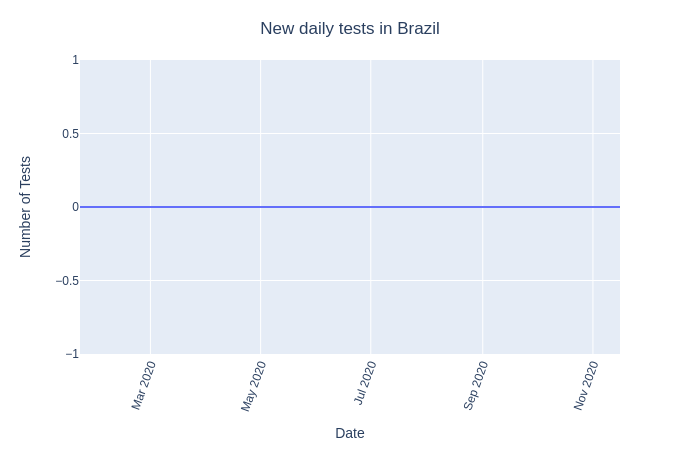

In [71]:
brazil["new_tests"].fillna(value=0, inplace=True) # Replace 0 instead of N/A
fig=px.line(brazil,x="date",
        y="new_tests")
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Number of Tests")
fig.update_layout(
    title={
        'text': "New daily tests in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Comment: It seems there is no data of tests of COVID-19 in Brazil. I have tried some other dataset, but none of them are completed. As a result, the test figure must be dropped unfortunately.

## Part 2: "How deadly is COVID-19 in Brazil?"

### * Case Fatality Rate (CFR)
Case fatality ratio (CFR) is the proportion of individuals diagnosed with a disease who die from that disease and is therefore a measure of severity among detected cases.

CFR here is calculated by using this formula:
$CFR=\frac{number\ of\ deaths\ from\ COVID-19}{number\ of\ confirmed\ cases\ from\ COVID-19}*100$

These codes are used to calculate CFR changing by day.

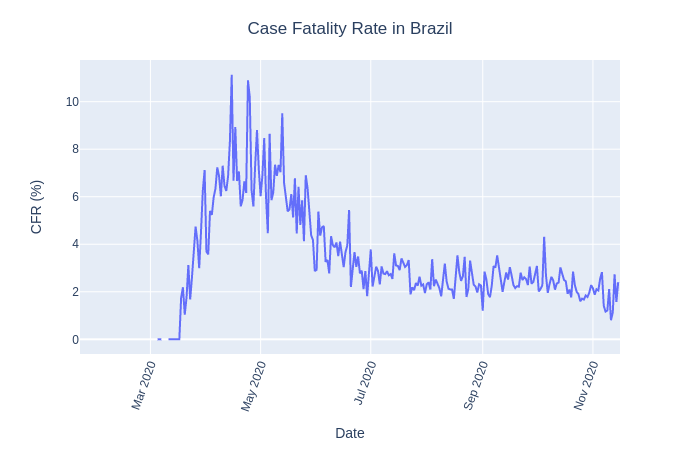

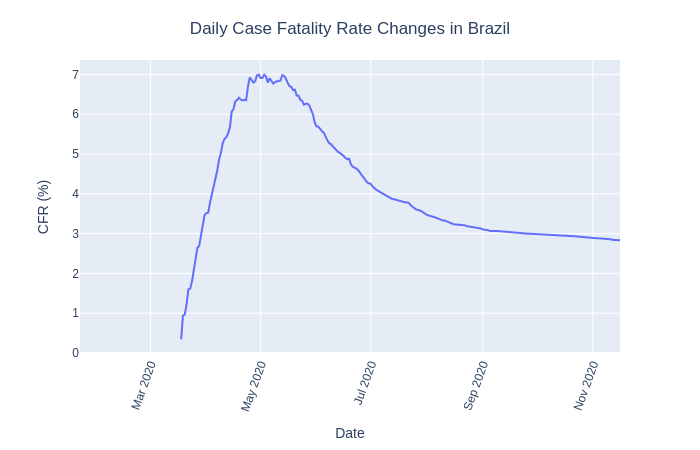

In [72]:
# Calculate CFR and its Daily changes
brazil['CFR']=(brazil['new_deaths']/(brazil['new_cases']))*100
brazil['total_CFR']=(brazil['total_deaths']/(brazil['total_cases']))*100

# Graph visualization
fig=px.line(brazil,x="date",
        y="CFR")

fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="CFR (%)")
fig.update_layout(
    title={
        'text': "Case Fatality Rate in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

fig=px.line(brazil,x="date",
        y="total_CFR")
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="CFR (%)")
fig.update_layout(
    title={
        'text': "Daily Case Fatality Rate Changes in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Comment:Both CFR and its daily changes were reached peak around May 2020, and then the curves have been flatten around 3%.

### * Infection Fatality Rate (IFR)
As a matter of fact, the biggest challenge to understanding how deadly the COVID-19 is, is the only information can be collected is only the confirmed number of infections. This is may be slight different from the true number of infections.
In order to get a more accurate IFR, this report applied with a few models which have already developed by other scholars or research institutions from https://ourworldindata.org/covid-model.

The code below imports the data for these models and returns the first 5 rows to gain an understanding of the data.

In [73]:
estimate = pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Model%20Datasets/daily-new-estimated-infections-of-covid-19.csv?token=AAABDAVS4GLDJ62MX7NN2BS7XT6EQ")
estimate.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (LSHTM, median)"
0,Afghanistan,AFG,2020-01-02,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2020-01-03,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020-01-04,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2020-01-05,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2020-01-06,0.0,NaN,NaN,NaN,NaN,NaN


The head of the data and metadata provided, tells us that for many countries, the estimated infections each day have been determined using different models. 

Similar to the cleaning done in the beginning of this report, we can extract for only India as this is our focus and format the date to datetime for visualisation purposes. 

In [74]:
estimate_brazil=estimate[estimate["Entity"]=="Brazil"]
estimate_brazil['Date']=pd.to_datetime(estimate_brazil['Date'], errors='ignore')

Before we use this data, it is important that we address the assumptions at hand. Last week we learned that data between different sources are not identical and vary slightly. While these estimate infections come from the same data source used earlier in this report, we need to satisfy the assumption that these two datasets can be compared. The code below plots the daily confirmed cases from both datasets to identify whether there is any variance between the two datasets

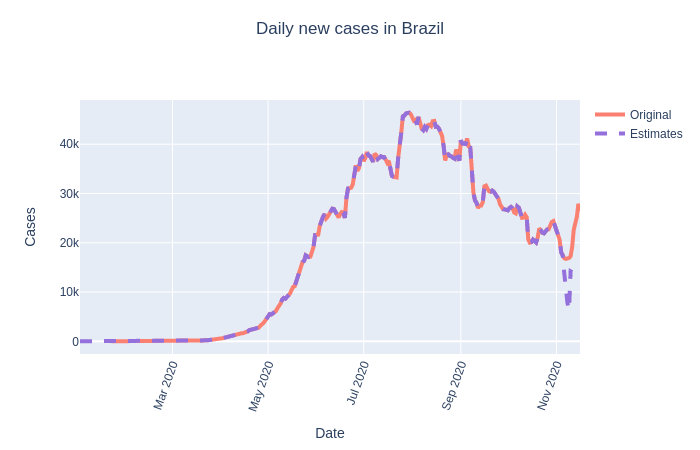

In [75]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=brazil["date"], 
                         y=brazil["new_cases_smoothed"],
                         name='Original',
                         line=dict(color='salmon', width=4)))

fig.add_trace(go.Scatter(x=estimate_brazil["Date"], 
                         y=estimate_brazil["Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"],
                         name='Estimates',
                         line=dict(color='mediumpurple', width=4, dash='dash')))

fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Cases")
fig.update_layout(
    title={
        'text': "Daily new cases in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show(renderer="png")

Comment:From this graph, it is obvious that the confirmed cases in both datasets exact and satisfy the assumption. Therefore we can use this new dataset in exploring the estimate infections.

The next step is deciding which model is most appropriate in estimating the daily infections. The different models obtained from https://ourworldindata.org/covid-models outlines what the model is based on and the key assumptions and potential limitations for each. Before choosing the most appropriate model, There are visualisions of all models that aim to estimate the number of infected cases in Brazil. The code below plots all four models as well as the confirmed cases on the one plot. 

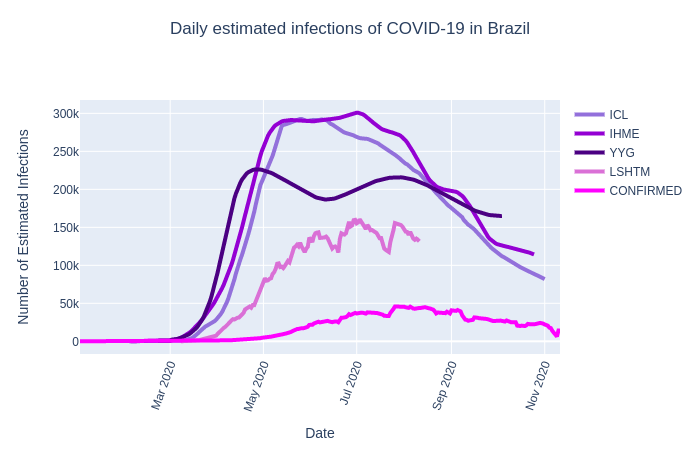

In [76]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=estimate_brazil["Date"], 
                         y=estimate_brazil["Daily new estimated infections of COVID-19 (ICL, mean)"],
                         name='ICL',
                         line=dict(color='mediumPurple', width=4)))

fig.add_trace(go.Scatter(x=estimate_brazil["Date"], 
                         y=estimate_brazil["Daily new estimated infections of COVID-19 (IHME, mean)"],
                         name='IHME',
                         line=dict(color='DarkViolet', width=4)))

fig.add_trace(go.Scatter(x=estimate_brazil["Date"], 
                         y=estimate_brazil["Daily new estimated infections of COVID-19 (YYG, mean)"],
                         name='YYG',
                         line=dict(color='Indigo', width=4)))

fig.add_trace(go.Scatter(x=estimate_brazil["Date"], 
                         y=estimate_brazil["Daily new estimated infections of COVID-19 (LSHTM, median)"],
                         name='LSHTM',
                         line=dict(color='orchid', width=4)))

fig.add_trace(go.Scatter(x=estimate_brazil["Date"], 
                         y=estimate_brazil["Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"],
                         name='CONFIRMED',
                         line=dict(color='fuchsia', width=4)))

fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Number of Estimated Infections")
fig.update_layout(
    title={
        'text': "Daily estimated infections of COVID-19 in Brazil",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

Comment: All models agree that the true infections are much greater than the confirmed cases but disagree by how much over time. As models use different assumptions, if these do not hold for a specific country, the data becomes less relevant and therefore won't accurately estimate the number of infected cases. Choosing a suitable model is necessary.

After comparing features of 4 models from https://ourworldindata.org/covid-models, the Institue for the model of **Health Metrics and Evaluatio (IHME)** seems the most suitable for Brazil in this case. As a result, I use this model in the rest of the report.

In [77]:
estimate_ihme = pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Model%20Datasets/daily-new-estimated-covid-19-infections-ihme-model.csv?token=AAABDASVNUCGEWYGSCGTV6K7XT6GY")
estimate_ihme.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (IHME, lower)","Daily new estimated infections of COVID-19 (IHME, upper)"
0,Afghanistan,AFG,2020-01-02,0.0,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2020-01-03,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020-01-04,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2020-01-05,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2020-01-06,0.0,NaN,NaN,NaN,NaN


Similar to above, we can clean the data and the code below does so by subsetting for India and changing the data format.

In [78]:
estimate_ihme_brazil=estimate_ihme[estimate_ihme["Entity"]=="Brazil"]
estimate_ihme_brazil['Date']=pd.to_datetime(estimate_ihme_brazil['Date'], errors='ignore')

The code below plots the confirmed cases, the mean estimated infections and the lower and upper bounds of these estimations on the same plot.

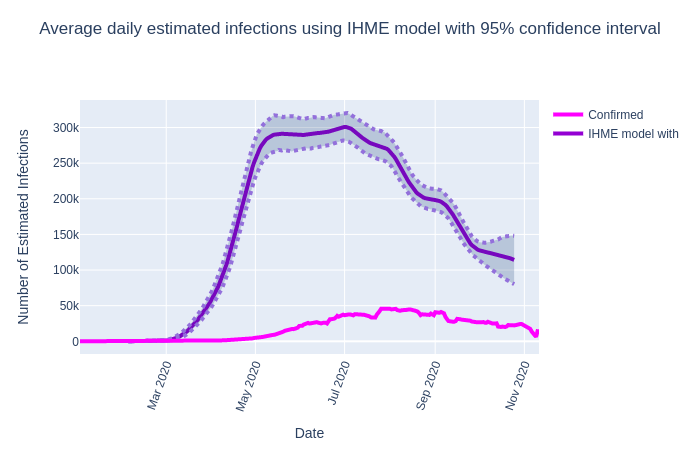

In [79]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=estimate_ihme_brazil["Date"], 
                         y=estimate_ihme_brazil["Daily new estimated infections of COVID-19 (IHME, mean)"],
                         line=dict(color='DarkViolet', width=4), name="IHME model with "))

fig.add_trace(go.Scatter(x=estimate_ihme_brazil["Date"], 
                         y=estimate_ihme_brazil["Daily new estimated infections of COVID-19 (IHME, lower)"],
                         line=dict(color='mediumPurple', width=4,dash='dot'), showlegend=False))

fig.add_trace(go.Scatter(x=estimate_ihme_brazil["Date"], 
                         y=estimate_ihme_brazil["Daily new estimated infections of COVID-19 (IHME, upper)"],
                         line=dict(color='mediumPurple', width=4,dash='dot'),
                         fillcolor="rgba(0,40,100,0.2)", fill = 'tonexty',showlegend=False))
fig.add_trace(go.Scatter(x=estimate_ihme_brazil["Date"], 
                         y=estimate_ihme_brazil["Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"],
                         line=dict(color='fuchsia', width=4), name="Confirmed"))



fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Number of Estimated Infections")
fig.update_layout(
    title={
        'text': "Average daily estimated infections using IHME model with 95% confidence interval",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Comment: Evidently, the estimated number of infections outweighs the confirmed cases and demonstrates the significance it plays in calculating the IFR. While the total deaths are still underestimated, the CFR calculated is generally an overestimation of the death rate and is therefore incorrect in explaining how deadly COVID-19 is. 

Here IFR is calculated in order to take considering the average number of infections over-time by using this formula: 
$IFR=\frac{number\ of\ deaths\ from\ COVID}{number\ of\ infected\ individuals\ from\ COVID}*100$

In [80]:
ifr_ihme=brazil["total_deaths"].max()/estimate_ihme_brazil["Daily new estimated infections of COVID-19 (IHME, mean)"].sum()
IFR = round(ifr_ihme*100,2)

In [81]:
ifr_ihme_upper=brazil["total_deaths"].max()/estimate_ihme_brazil["Daily new estimated infections of COVID-19 (IHME, upper)"].sum()
ifr_ihme_lower=brazil["total_deaths"].max()/estimate_ihme_brazil["Daily new estimated infections of COVID-19 (IHME, lower)"].sum()
un = round(abs(ifr_ihme_upper-ifr_ihme_lower)*100/2,2)

In [82]:
from IPython.display import Markdown as md
md("The IFR is {}±{} .".format(round(IFR,2),round(un,2)))

The IFR is 0.36±0.03 .

## Conclusion
In answering "how deadly COVID-19", the IFR is more suitable than the CFR, despite larger uncertainties due to estimations in the number of infections. The IFR of COVID-19 in Brazil is much more smaller than the CFR. This means that most patients generally recovered after suffering COVID-19. However, there is still diificult to quantify whether this influence the rate as our assumptions or not.